In [ ]:
import pandas as pd
import numpy as np
from  sklearn.preprocessing import MinMaxScaler

lembrar depois de manipular os outliers e 

In [ ]:
BaseDados = pd.read_csv('../instancia/BaseParaibaDoSulPreProcessadas-EstacoesUnidas.csv', index_col='Data')
BaseDados.head()

In [ ]:
def normalizaBase(dataset, tamanhoConjTeste):
    normalizer = MinMaxScaler(feature_range=(0.1, 0.9))
    normalizer.fit(dataset[:-tamanhoConjTeste])
#     normalizer.transform(dataset).T
    return normalizer.transform(dataset)

In [ ]:
dataset = normalizaBase(BaseDados.to_numpy(), 3701)
# BaseDados.to_numpy().shape
# len(BaseDados.to_numpy().T[:, :-tamanhoConjTeste][0])

In [ ]:
def janelamento(serie, ordem):
    """
    Recebe uma serie e retorna um ndArray 
    com n linhas janeladas de ordem em ordem
    """    
    tamanhoSerie, numeroEstacoes = serie.shape
    print(serie.shape)
    x = list()
    y = list()
    yAtual = ordem
    while(yAtual < tamanhoSerie):
        x.append(serie[(yAtual-ordem):yAtual])
        y.append(serie[yAtual])
        yAtual+=1
        
    x = np.array(x).reshape((-1, ordem, numeroEstacoes))
    y = np.array(y).reshape((-1, 1, numeroEstacoes))
    return x, y

In [ ]:
X, Y = janelamento(dataset, 10)
print(X.shape, Y.shape)

## dividir em teste e Treino

In [ ]:
TamanhoBase = len(X)
tamanhoConjTreino = int(np.floor(len(X)*0.75))
tamanhoConjValidacao = int(np.ceil(len(X)*0.10))
tamanhoConjTeste = int(np.ceil(len(X)*0.15))
print(tamanhoConjTreino, tamanhoConjValidacao, tamanhoConjTeste)
TamanhoBase - (tamanhoConjTreino + tamanhoConjValidacao + tamanhoConjTeste)

18502 2467 3701


0

## Como tratar esses Nans?

https://www.researchgate.net/publication/224654729_Pattern_Classification_with_Missing_Values_using_Multitask_Learning

# por enquanto coloquei 0 neles

In [ ]:
x_treino = X[:tamanhoConjTreino]
y_treino = Y[:tamanhoConjTreino]
x_validacao = X[tamanhoConjTreino: tamanhoConjTreino+ tamanhoConjValidacao]
y_validacao = Y[tamanhoConjTreino: tamanhoConjTreino+ tamanhoConjValidacao]
x_teste = X[-tamanhoConjTeste: ]
y_teste = Y[-tamanhoConjTeste: ]

In [ ]:
print(x_treino.shape, y_treino.shape)

(18502, 10, 45) (18502, 1, 45)


In [ ]:
import tensorflow.keras as k

In [ ]:
model = k.models.Sequential()
model.add(k.layers.Conv1D(100, 3, input_shape=(None, 45),))
model.add(k.layers.LSTM(500,  return_sequences=True))
model.add(k.layers.Dense(45))
model.compile(optimizer='adam',
              loss='mse', metrics=['mape'])
save = k.callbacks.ModelCheckpoint('../model/modeloMultiTask', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.fit(x_treino, 
          y_treino, 
          validation_data=[x_validacao, y_validacao], 
          epochs=100, 
          batch_size=256,
          callbacks=[save]
         )


Train on 18502 samples, validate on 2467 samples
Epoch 1/100
18502/18502 [==============================] - 11s 610us/step - loss: 0.0049 - mean_absolute_percentage_error: 27.7521 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 17.9664
Epoch 2/100
18502/18502 [==============================] - 5s 273us/step - loss: 0.0020 - mean_absolute_percentage_error: 16.3033 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 16.1975
Epoch 3/100
18502/18502 [==============================] - 3s 153us/step - loss: 0.0018 - mean_absolute_percentage_error: 14.4502 - val_loss: 0.0022 - val_mean_absolute_percentage_error: 15.1041
Epoch 4/100
18502/18502 [==============================] - 3s 150us/step - loss: 0.0017 - mean_absolute_percentage_error: 13.5922 - val_loss: 0.0022 - val_mean_absolute_percentage_error: 14.5328
Epoch 5/100
18502/18502 [==============================] - 3s 150us/step - loss: 0.0016 - mean_absolute_percentage_error: 13.0384 - val_loss: 0.0021 - val_mean_absolute_p

In [24]:
predict = model.predict(x_teste)

In [25]:
print(y_teste.shape, predict.shape)

(3701, 1, 45) (3701, 8, 45)


In [26]:
def mape(predict, target):
    return np.mean(np.abs(target - predict)/target, axis=0)*100


In [33]:
def graficoMape(mape):
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=[10,9])
    sns.barplot(np.arange(45), mape)
    plt.grid(b=True, axis='y')
    plt.xlabel('Estações de medição')
    plt.ylabel('Mape(%)')
    plt.ylim([0, 50])
    plt.show()

# Resultados da ultima rede treinada

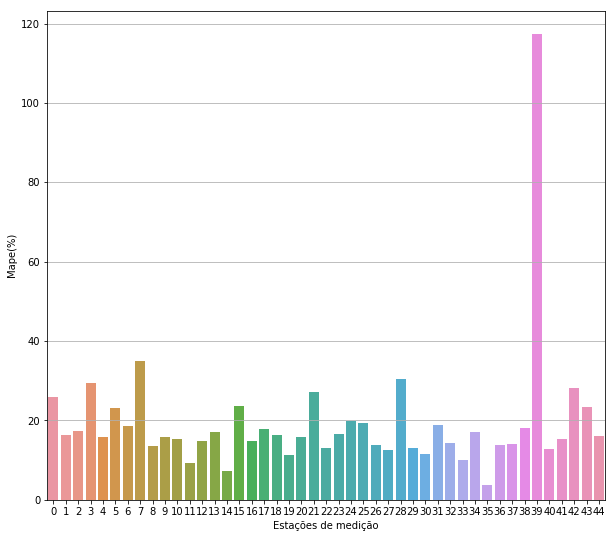

In [29]:
graficoMape( mape(predict, y_teste)[0])

# melhor modelo de acordo com a validacao

In [30]:
model = k.models.load_model('../model/modeloMultiTask')

In [31]:
predictMelhorModelo = model.predict(x_teste)

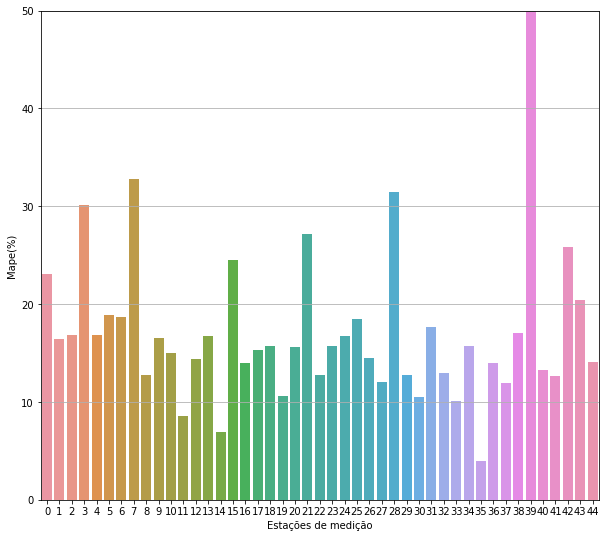

In [34]:
graficoMape(mape(predictMelhorModelo, y_teste)[0])

# Os resultado foram muito bons para uma primeira tentativa, talvez arrumando a forma de preencher dados faltantes, tenhamos uma melhora notável.

slide do cprm sobre os desastres em estrada da cunha
http://www.acquacon.com.br/xsrhn/palestras/14.00hrs_pap004316-%28mariacrystianne%29.pdf

In [ ]:
model.summary()

# perguntar sobre:
+ matriculas em disciplinas EAD*** e pré-requisito
+ colisao de disciplinas es, ihc e sistemasDistribuidos
+ tarefa de tcc.